#Librerias


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import sympy
import copy
#%matplotlib inline

#Principal
Aqui se maneja el codigo, se puede modificar:
  
  -Vector inicial

  -La funcion a evaluar

  Eng:
  
  Here you can control the code, you can modify:
  
  -The initial Vector

  -The function to evaluate


* Iteracion 1   - Vector: [ 0.   -1.75]   - F(V): -2.1875
* Iteracion 2   - Vector: [-0.875 -1.625]   - F(V): -3.068359375
* Iteracion 3   - Vector: [-0.5390625  -1.80859375]   - F(V): -3.288515329360962
* Iteracion 4   - Vector: [-0.68635559 -1.85118103]   - F(V): -3.324663027418243
* Iteracion 5   - Vector: [-0.63348409 -1.90099731]   - F(V): -3.3335279687318815
* Iteracion 6   - Vector: [-0.66511493 -1.91691518]   - F(V): -3.335740819572096
* Iteracion 7   - Vector: [-0.6535306  -1.93042059]   - F(V): -3.3363267553965708
* Iteracion 8   - Vector: [-0.66118113 -1.93520003]   - F(V): -3.3364829455613494
* Iteracion 9   - Vector: [-0.65843171 -1.93890046]   - F(V): -3.3365251519237127
* Iteracion 10   - Vector: [-0.66226692 -1.94166555]   - F(V): -3.336526191337544


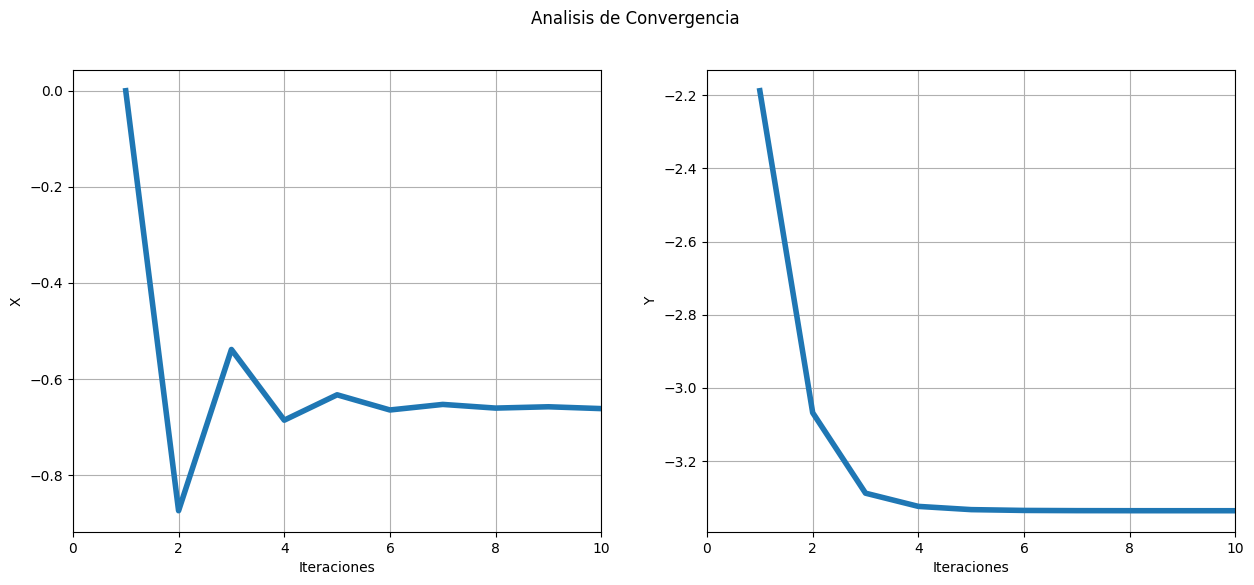

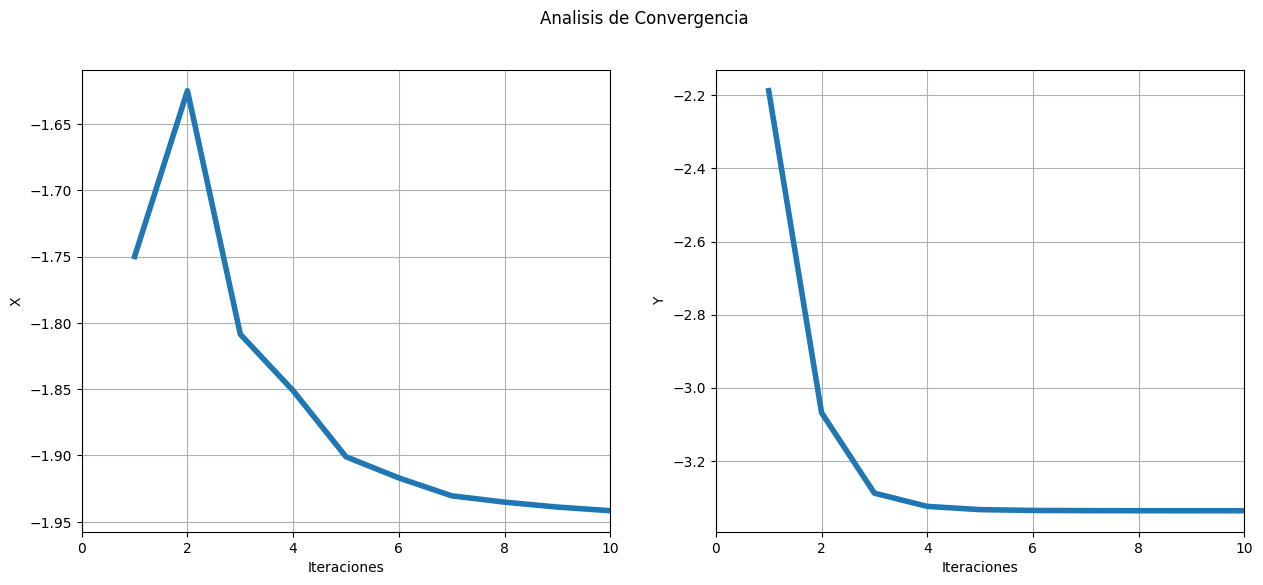

In [9]:
IterMax=50
vector=[-2,-2]

#Function Mod
numvar=2
x=sympy.symbols('x')
y=sympy.symbols('y')
namevar=['x','y']

f=x**2-2*x*y+y**2+3*y-y*x**2

TF=100
TFant=200
Contador=0
Registrox=[]
Registroy=[]
while(np.abs(TF-TFant)>1e-5 and Contador<IterMax):
  #Evaluamos gradiente en el vector
  Grad=Gradiente(vector)

  #Evaluamos la Hesiana del Vector
  Hes=Hesiana(vector)

  #Evaluamos si es definida positiva
  while(Positiva(Hes)==False):
    #Si no aumentamos con perturbacion
    for i in range(numvar):
        Hes[i][i]=Hes[i][i]+0.01

  #Checamos si esta bien condicionada
  Cond=np.linalg.cond(Hes)
  if(Cond-1<0.5):
    #Resolvemos el sistema de ecuaciones y la distancia sera la solucion al sistema
    Dis=np.linalg.solve(Hes,Grad)
  #Si no, entonces su distancia sera el Gradiente
  else:
    Dis=copy.deepcopy(Grad)

  #Obtenemos el paso
  Lambda=Paso(Grad,vector)

  #Actualizamos a X
  vector=np.add(vector,np.multiply(Lambda,Dis))

  #Obtenemos el evaluado del vector
  TFant=TF
  Fev=f
  for i in range(0,numvar):
    Fev=Fev.subs(namevar[i],vector[i])


  TF=float(Fev)


  #Agregamos a registro
  Contador+=1
  Registrox.append([Contador,vector[0],TF])
  Registroy.append([Contador,vector[1],TF])

  print("* Iteracion",Contador,"  - Vector:",vector,"  - F(V):",float(TF))

Evaluacion(Registrox)
Evaluacion(Registroy)

#Gradiente y Hesiana

In [2]:
def Gradiente(vector):

    grad=[]
    #Creacion Gradiente
    for i in range (0,numvar):
        g=-1*sympy.diff(f,namevar[i])
        grad.append(g)

    #evaluacion del gradiente en los puntos
    for i in range(0,numvar):
      for j in range(0,numvar):
        grad[i]=grad[i].subs(namevar[j],vector[j])
    #convertir a float
    for i in range(0,numvar):
      grad[i]=float(grad[i])


    return grad

In [3]:
def Hesiana(Vector):
  H=sympy.hessian(f,namevar)
  for i in range(0,numvar):
    H=H.subs(namevar[i],vector[i])
  Hes=np.array(H).astype(float)

  return(Hes)

def Positiva(Hes):
  EigenValues=np.linalg.eigvals(Hes)
  for i in range(0,len(EigenValues)):
    if(EigenValues[i]<0):
      return False

  return True

#Paso

In [4]:
def Paso(Grad,Vector):
#if(True):
  Lambda=1
  a=0.0001
  b=0.1

  while(Function(np.add(Vector,np.multiply(Grad,Lambda)))>(Function(Vector)+a*Lambda*np.matmul(Grad,Grad)) and b*np.matmul(Grad,Grad)>np.matmul(Gradiente(np.add(Vector,np.multiply(Lambda,Grad))),Grad)):
    Lambda=0.5*Lambda

  return Lambda

#Evaluacion

In [5]:
def Function(Vector):
  Fe=f
  for i in range(0,numvar):
    Fe=Fe.subs(namevar[i],Vector[i])

  Fe=float(Fe)
  return Fe

In [6]:
#Evalua los registros dados de los metodos
def Evaluacion(Registro):
  #Conversion para facilitar la graficacion
  Registro=np.array(Registro)

  fig, axs=plt.subplots(1,2,figsize=(15,6))
  #Ponemos titulo
  fig.suptitle('Analisis de Convergencia')
  #Primera Grafica
  axs[0].plot(Registro[:,0],Registro[:,1],linewidth=4)
  axs[0].set_xlabel('Iteraciones')
  axs[0].set_ylabel('X')
  axs[0].grid()
  axs[0].set_xlim([0,len(Registro)])
  #Segunda Grafica
  axs[1].plot(Registro[:,0],Registro[:,2],linewidth=4)
  axs[1].set_xlabel('Iteraciones')
  axs[1].set_ylabel('Y')
  axs[1].grid()
  axs[1].set_xlim([0,len(Registro)])
  #Mostramos las graficas
  plt.show()